# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [104]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [160]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


In [162]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

2416 rows x 7 columns, every column is an object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [163]:
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

<Axes: >

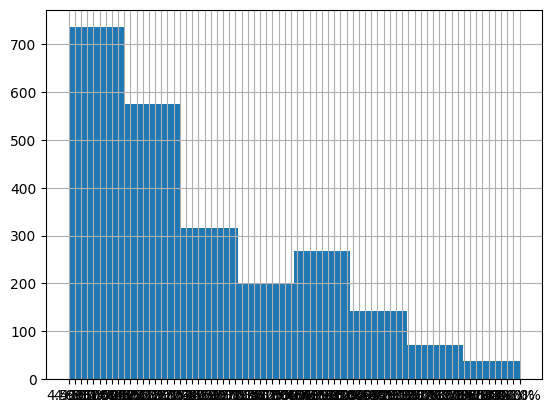

In [164]:
df['ABV'].hist(bins=8)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [165]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [166]:
df['ABV'] = df['ABV'].str.replace('%', '')
df['ABV'].head()

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [167]:
df['ABV'] = df['ABV'].astype(float)
df['ABV'].head()

0    4.5
1    4.9
2    4.8
3    6.0
4    6.0
Name: ABV, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

<Axes: >

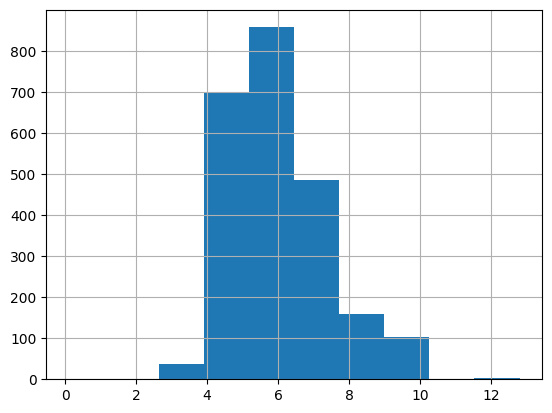

In [168]:
df['ABV'].hist()

In [169]:
df['ABV'].mean()

5.977342419080068

In [170]:
df['ABV'].median()

5.6

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [171]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

There are 68 nulls.

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [172]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [173]:
df.loc[df['Location'] == 'Brooklyn, NY', 'Beer']

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most different cans of beer?

In [174]:
df.loc[df['Location'] == 'Brooklyn, NY'].value_counts('Brewery')

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [175]:
df.loc[df['Brewery'] == 'Sixpoint Craft Ales'].value_counts('Style')

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Rye Beer                          2
American Pale Ale (APA)           1
American Brown Ale                1
American Strong Ale               1
American Stout                    1
American Pale Wheat Ale           1
Belgian Pale Ale                  1
Fruit / Vegetable Beer            1
Gose                              1
Pumpkin Ale                       1
Saison / Farmhouse Ale            1
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [176]:
df[df['Location'].str.contains(', NY', na=False)]['Brewery'].value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Upstate Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
Montauk Brewing Company           2
Southampton Publick House         1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

### Now *count* all of the breweries in New York state

In [177]:
df[df['Location'].str.contains(', NY', na=False)]['Brewery'].value_counts().sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [178]:
df[df['Style'].str.contains('IPA', na=False)]['Style'].value_counts()

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: count, dtype: int64

In [179]:
df[df['Style'].str.contains('India Pale Ale', na=False)]['Style'].value_counts()
# Checking here that I didnt miss anything, this would have been included with IPA
# df[df['Style'].str.contains('Pale Ale', na=False)]['Style'].value_counts() - also used this to double check other versions

Style
English India Pale Ale (IPA)    13
Name: count, dtype: int64

In [180]:
df[df['Style'].str.contains('IPA', na=False)]['Beer']

0                Get Together
6              Citra Ass Down
14                Rico Sauvin
17               Pile of Face
24             Habitus (2014)
                ...          
2403             Abrasive Ale
2406                  Furious
2408    Brew Free! or Die IPA
2412       GUBNA Imperial IPA
2414        Gordon Ale (2009)
Name: Beer, Length: 571, dtype: object

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [181]:
df['IBUs'].median()

35.0

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [182]:
df['IBUs'].value_counts(ascending=False)
# showed the null value is "Does not apply"
# That worked, now all this other conversion stuff I was gonna try is unnecessary now that I've reloaded it up top.

IBUs
20.0     82
35.0     60
65.0     54
30.0     53
70.0     48
         ..
63.0      1
105.0     1
138.0     1
108.0     1
113.0     1
Name: count, Length: 107, dtype: int64

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

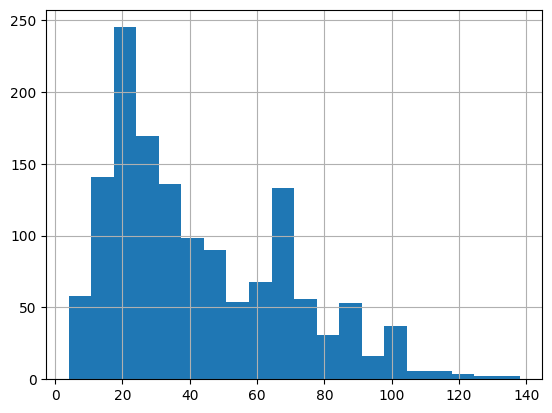

In [183]:
df['IBUs'].hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [186]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [199]:
df[df['IBUs'] >= 64]['Beer']

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 353, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [201]:
df[df['IBUs'] < 21]['Beer']

2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [205]:
df.groupby('Style')['IBUs'].median().sort_values(ascending = False)
# This looks correct to me.

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

In [210]:
df.groupby('Style')['IBUs'].median().isna().value_counts()
# confirming there's 9 null values.

IBUs
False    90
True      9
Name: count, dtype: int64

In [212]:
df.groupby('Style')['IBUs'].median().sort_values(ascending = False).tail(10)
# double checking I did it right by printing the bottom 10

Style
Berliner Weissbier      8.0
American Malt Liquor    NaN
Braggot                 NaN
Cider                   NaN
Flanders Red Ale        NaN
Kristalweizen           NaN
Low Alcohol Beer        NaN
Mead                    NaN
Rauchbier               NaN
Shandy                  NaN
Name: IBUs, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [215]:
df[df['IBUs'] > 64]['Style'].value_counts(ascending = False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [216]:
df[df['IBUs'] < 21]['Style'].value_counts(ascending = False).head(5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [217]:
wheat = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]

In [227]:
wheat_styles = df['Style'].isin(wheat)
df[wheat_styles]['Style'].value_counts()
# Ok we've got our list

Style
American Pale Wheat Ale    97
Witbier                    51
Hefeweizen                 40
Name: count, dtype: int64

In [228]:
df[wheat_styles]['IBUs'].median()

18.0

## Draw a histogram of the IBUs of those beers

<Axes: >

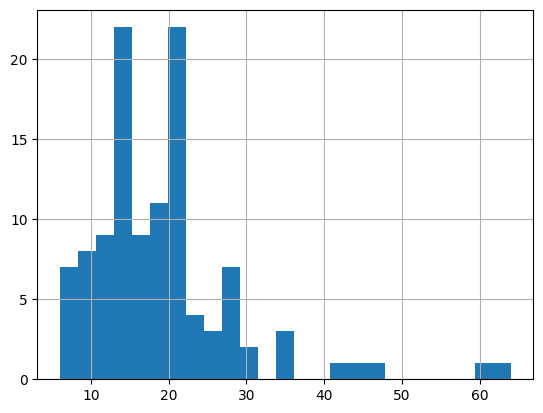

In [229]:
df[wheat_styles]['IBUs'].hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [231]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].median()

70.0

<Axes: >

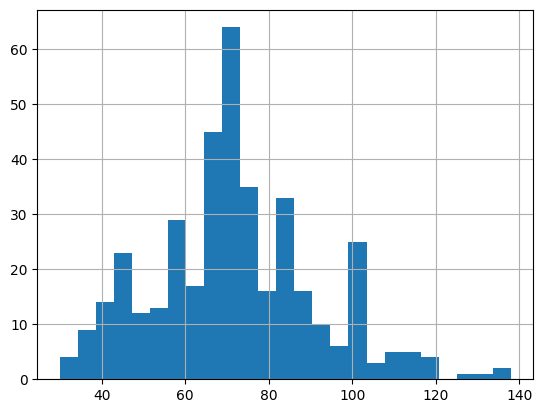

In [232]:
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].hist(bins=25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

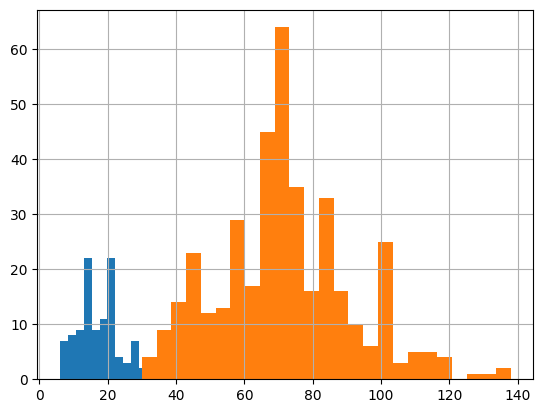

In [233]:
df[wheat_styles]['IBUs'].hist(bins=25)
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].hist(bins=25)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [234]:
df[df['Style'].str.contains('IPA', na=False)]['ABV'].median()

6.8

In [235]:
df[wheat_styles]['ABV'].median()

5.0

## Good work!